## Introduction
In this example, I develop and train a deep learning model utilizing the Fashion-MNIST dataset, which comprises 28x28 grayscale images of various clothing items, such as shirts, sneakers, and coats, categorized into 10 distinct classes. The model, a fully connected neural network, is designed to accurately classify these images based on their visual features.

## Step 1: Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Step 2: Load and Prepare Dataset

In [2]:
# Transform: Convert images to tensors & normalize pixel values
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # mean = 0.5, std = 0.5 for grayscale
])

In [3]:
# Download and load FashionMNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 9000362.95it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 215518.09it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3992430.87it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 33218887.68it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
# Turn into batches for efficient training and better learning
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Step 3: Visualize Sample Image

Label: 3


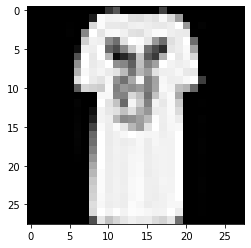

In [19]:
images, labels = next(iter(train_loader))
plt.imshow(images[0].squeeze(), cmap='gray')
print("Label:", labels[0].item())  # Label is a number from 0–9

### Fashion-MNIST label names
| Label | Class Name   |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |


## Step 4: Define a Simple Neural Network

In [20]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)     # Second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Output: 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)         # Flatten the image (28x28 → 784)
        x = torch.relu(self.fc1(x))   # Activation after first layer
        x = torch.relu(self.fc2(x))   # Activation after second layer
        x = self.fc3(x)               # Output layer (no softmax needed with CrossEntropy)
        return x

model = SimpleNN()

## Train Model

In [25]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Use Adam and set learning rate as 0.001

In [23]:
# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()           # Reset gradients
        outputs = model(images)         # Forward pass
        loss = criterion(outputs, labels)
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights

        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.4998
Epoch 2, Loss: 0.3773
Epoch 3, Loss: 0.3389
Epoch 4, Loss: 0.3156
Epoch 5, Loss: 0.2968


## Evaluate Model

In [24]:
correct = 0
total = 0

model.eval()  # Turn off dropout/batchnorm (if used)

with torch.no_grad():  # No need to calculate gradients now
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 87.72%
